In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mvt = pd.read_csv("robots_movement.csv")
srf = pd.read_csv("robots_surface.csv")

In [3]:
mvt.tail()

,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
462075,3609,123,0.066507,-0.122230,0.025383,0.10144,4.9746,-8.1722,-2.042740,-0.005771,-2.062089
462076,3609,124,-0.027695,0.012149,0.033650,0.39107,5.7629,-6.6894,-2.042647,-0.005762,-2.062007
462077,3609,125,-0.113900,0.018233,0.025259,-2.60320,3.2469,-8.5506,-2.042579,-0.005832,-2.062040
462078,3609,126,-0.077650,-0.067154,0.037391,-0.21112,4.0604,-9.7362,-2.042499,-0.005699,-2.062177
462079,3609,127,-0.039713,-0.066432,0.057027,-1.69040,4.6022,-10.0840,-2.042425,-0.005584,-2.062376


In [4]:
srf.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


<AxesSubplot:xlabel='surface', ylabel='count'>

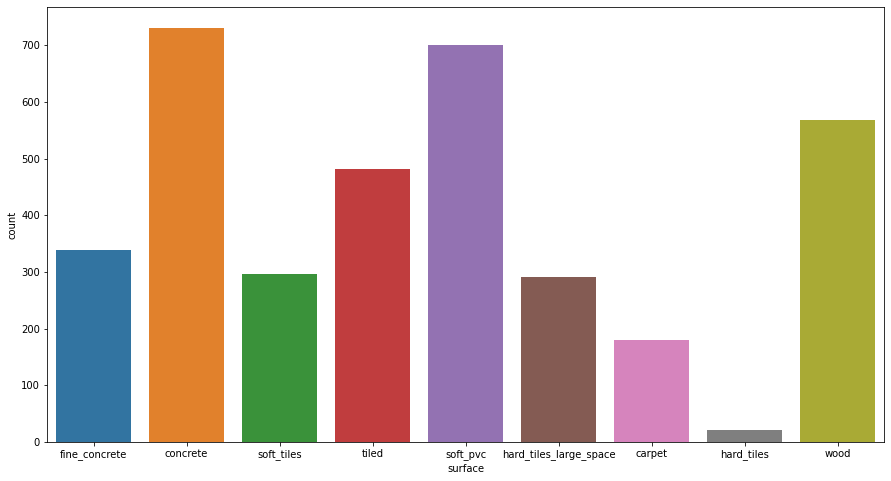

In [5]:
plt.figure(figsize = (15,8))
sns.countplot(x=srf["surface"])

PART 1 QUESTION 2

There are 9 types of surfaces.
The different types of surfaces are fine concrete, concrete, soft tiles, tiled, soft PVC, hard tiles large space, carpet, hard tiles, and wood. 
The distribution of different surface types is not uniform - there are over 700 experiments with concrete while less than 100 experiments with hard tiles. Overall, every surface was tested for at least 100 experiments except for hard tiles, so the distribution is almost balanced but may need resampling or SMOTE for the hard tiles data.

<AxesSubplot:>

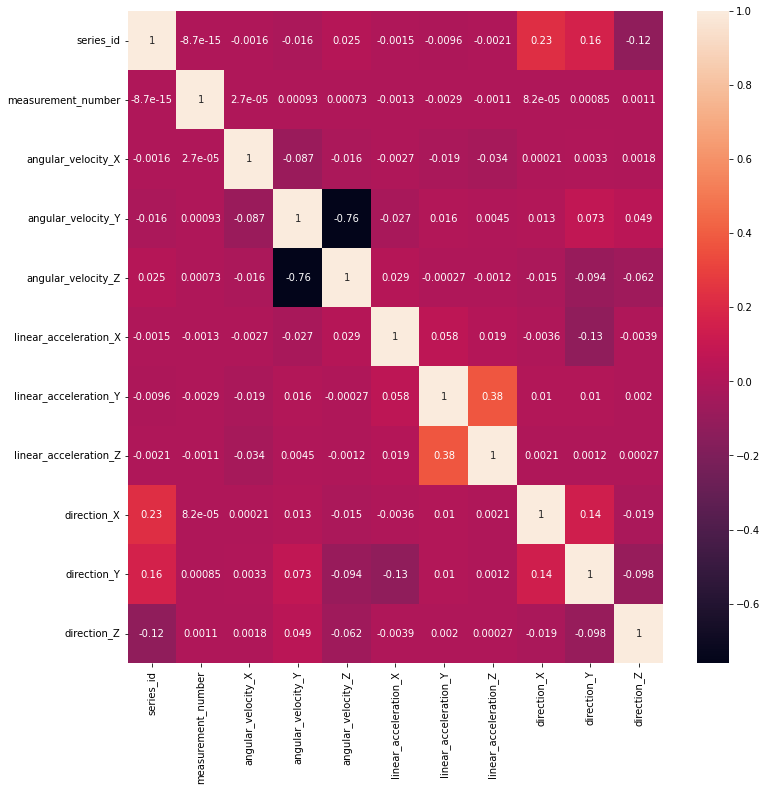

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(mvt.corr(),annot=True)

PART QUESTION 3

There is overall weak correlation between the input features, except for between angular velocity in the y and z direction, which have a strong negative correlation. This may mean the robot is not capable of moving in the y and z direction at the same time, or may have been constrained by the set up of the experiment or its physical constraints (i.e. a sloped surface, programmed path).

Text(0, 0.5, 'Angular Velocity X')

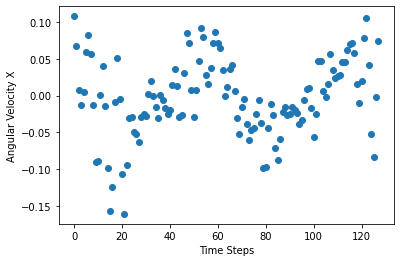

In [7]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["angular_velocity_X"])
plt.xlabel("Time Steps")
plt.ylabel("Angular Velocity X")

Text(0, 0.5, 'Angular Velocity Y')

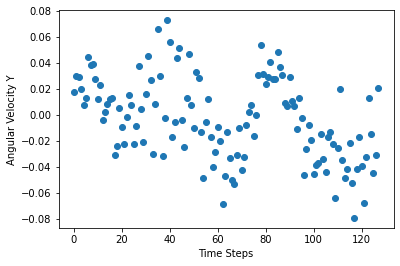

In [8]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["angular_velocity_Y"])
plt.xlabel("Time Steps")
plt.ylabel("Angular Velocity Y")

Text(0, 0.5, 'Angular Velocity Z')

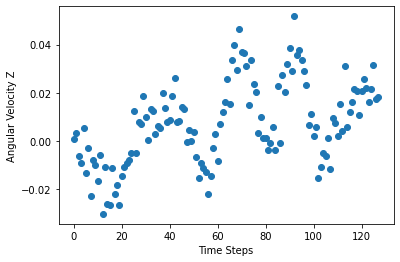

In [9]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["angular_velocity_Z"])
plt.xlabel("Time Steps")
plt.ylabel("Angular Velocity Z")

Text(0, 0.5, 'Linear Acceleration X')

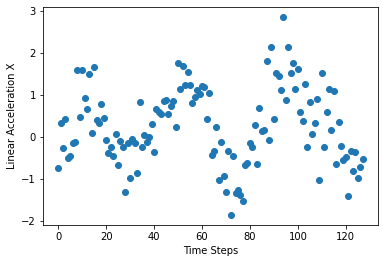

In [10]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["linear_acceleration_X"])
plt.xlabel("Time Steps")
plt.ylabel("Linear Acceleration X")

Text(0, 0.5, 'Linear Acceleration Y')

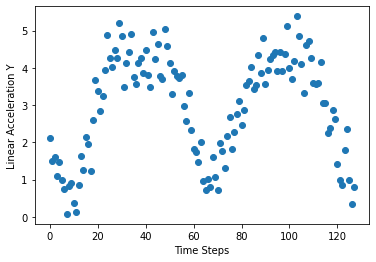

In [11]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["linear_acceleration_Y"])
plt.xlabel("Time Steps")
plt.ylabel("Linear Acceleration Y")

Text(0, 0.5, 'Linear Acceleration Z')

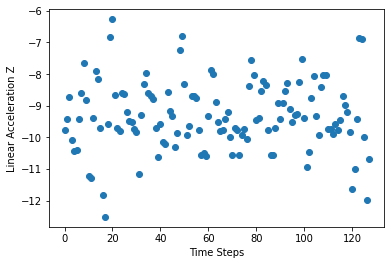

In [12]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["linear_acceleration_Z"])
plt.xlabel("Time Steps")
plt.ylabel("Linear Acceleration Z")

Text(0, 0.5, 'Direction X')

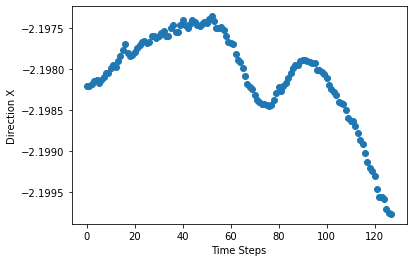

In [13]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["direction_X"])
plt.xlabel("Time Steps")
plt.ylabel("Direction X")

Text(0, 0.5, 'Direction Y')

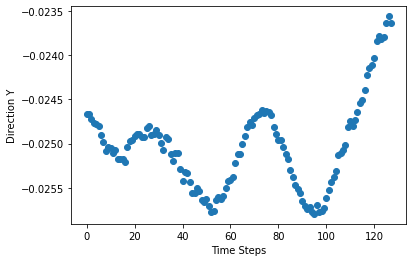

In [14]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["direction_Y"])
plt.xlabel("Time Steps")
plt.ylabel("Direction Y")

Text(0, 0.5, 'Direction Z')

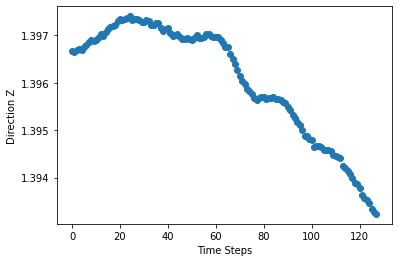

In [15]:
plt.scatter(mvt[mvt["series_id"]==0]["measurement_number"],mvt[mvt["series_id"]==0]["direction_Z"])
plt.xlabel("Time Steps")
plt.ylabel("Direction Z")

PART 1 QUESTION 4

There is a pattern or relationship between the angular velocity and time, linear acceleration and time, and direction and time for the x, y, and z components. It seems like the robot is moving in a circle because both x and y angular velocities and linear accelerations following a curve similar to a sine curve. 

In [16]:
mvt_grouped = mvt.groupby("series_id").mean()

In [17]:
mvt_grouped.shape

(3610, 10)

PART 2 QUESTION 1 

The shape of the movement data grouped by the mean of the series IDs is 3610 rows with 10 columns.

In [18]:
x = mvt_grouped.drop(["measurement_number"],axis=1)

In [19]:
y = srf["surface"]

In [20]:
y

0       fine_concrete
1            concrete
2            concrete
3            concrete
4          soft_tiles
            ...      
3605            tiled
3606         concrete
3607         soft_pvc
3608         soft_pvc
3609         concrete
Name: surface, Length: 3610, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [22]:
y

array([2, 1, 1, ..., 5, 5, 1])

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=500)
lr.fit(x_train_scaled, y_train)

print(lr.score(x_train_scaled,y_train))

y_pred_lr = lr.predict(x_test_scaled)
print(metrics.accuracy_score(y_test,y_pred_lr))
print(metrics.confusion_matrix(y_pred_lr,y_test))
#["fine_concrete","concrete","soft_tiles","tiled","soft_pvc","hard_tiles_large_space","carpet","hard_tiles","wood"]]
print(metrics.classification_report(y_pred_lr,y_test))

0.3197467352592006
0.32409972299168976
[[  4   1   1   0   0   2   1   0   3]
 [ 25 130  36   0  27  51  47  43  48]
 [  1   1   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   1   4   0   1   4   0   6   0]
 [  1  42  21   4  46 120  37  58  26]
 [  0   3   9   0   0   3   0   0   0]
 [  3  11   6   0   0  15   0  18   6]
 [ 14  32  28   3  18  18   4  21  78]]
              precision    recall  f1-score   support

           0       0.08      0.33      0.13        12
           1       0.59      0.32      0.41       407
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         0
           4       0.01      0.06      0.02        16
           5       0.56      0.34      0.42       355
           6       0.00      0.00      0.00        15
           7       0.12      0.31      0.18        59
           8       0.48      0.36      0.41       216

    accuracy                           0.32      1083
   macro avg 

C:\Users\emund\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emund\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emund\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` paramete

PART 2 QUESTION 4

This model performs very poorly. This is partially due to the imbalance in the distribution of data and the way the training group was broken as seen by one of the surface types excluded from the training group entirely. The accuracy is very low, below 0.5 and the confusion matrix shows many misclassifications. The poor performance could also be due to some correlation between the y and z angular velocity.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train_scaled,y_train)

print(knn.score(x_train_scaled,y_train))

y_pred_knn = knn.predict(x_test_scaled)
print(metrics.accuracy_score(y_test,y_pred_knn))
print(metrics.confusion_matrix(y_pred_knn,y_test))
print(metrics.classification_report(y_pred_knn,y_test))

0.7882865057380293
0.5235457063711911
[[ 27  22   4   0   3   6   2   7  13]
 [ 15 125  14   0  18  24   7  34  25]
 [  1  11  57   3   6  14   3   7   8]
 [  0   1   0   1   3   3   3   0   0]
 [  0  14   4   1  41  11   8   4  10]
 [  1  25  18   0  14 143   7  35  23]
 [  0   6   3   0   4   4  58  10   8]
 [  0  11   0   0   1   6   1  45   4]
 [  4   6   5   2   2   3   0   4  70]]
              precision    recall  f1-score   support

           0       0.56      0.32      0.41        84
           1       0.57      0.48      0.52       262
           2       0.54      0.52      0.53       110
           3       0.14      0.09      0.11        11
           4       0.45      0.44      0.44        93
           5       0.67      0.54      0.60       266
           6       0.65      0.62      0.64        93
           7       0.31      0.66      0.42        68
           8       0.43      0.73      0.54        96

    accuracy                           0.52      1083
   macro avg  

PART 2 QUESTION 5

The K Nearest Neighbors model performs significantly better than the logistic regression model, although still poorly with an accuracy score of 0.79 on the training data and a score of 0.53 on the test data. The precision and recall are also unbalanced for certain surfaces, with the 8th encoded surface having a precision of 0.36 but a recall of 0.73.

In [27]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors":[5,6,7,8,9,10],
    "metric":['l1','l2']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled,y_train)
print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.5789488019731213
{'metric': 'l1', 'n_neighbors': 5}
KNeighborsClassifier(metric='l1')


In [28]:
knn = KNeighborsClassifier(n_neighbors = 7,metric='l1')
knn.fit(x_train_scaled,y_train)

print(knn.score(x_train_scaled,y_train))

y_pred_knn = knn.predict(x_test_scaled)
print(metrics.accuracy_score(y_test,y_pred_knn))
print(metrics.confusion_matrix(y_pred_knn,y_test))
print(metrics.classification_report(y_pred_knn,y_test))

0.7253660466956866
0.6103416435826408
[[ 19   5   0   0   0   1   0   6   5]
 [ 11 136   7   0   9   3   2  23  20]
 [  6   7  56   1   5   5   1   5   3]
 [  0   0   0   1   3   0   1   0   0]
 [  0   9   4   1  40   6   3   2   4]
 [  2  30  15   1  15 180   9  28  25]
 [  0  11   5   0  12   3  71  10   3]
 [  3  10   1   0   4  11   2  62   5]
 [  7  13  17   3   4   5   0  10  96]]
              precision    recall  f1-score   support

           0       0.40      0.53      0.45        36
           1       0.62      0.64      0.63       211
           2       0.53      0.63      0.58        89
           3       0.14      0.20      0.17         5
           4       0.43      0.58      0.50        69
           5       0.84      0.59      0.69       305
           6       0.80      0.62      0.70       115
           7       0.42      0.63      0.51        98
           8       0.60      0.62      0.61       155

    accuracy                           0.61      1083
   macro avg  

PART 2 QUESTION 6A

The best parameters are Manhattan distances (l1) for the metric and 7 neighbors. Yes, this improves the performance of the model from a score of 0.53 to a score of 0.59 because GridSearchCV ran the K Nearest Neighbors model multiple times with different combinations of distance metrics and numbers of nearest neighbors as well as performed cross validation, which means resampling the data to check if the model was overfit to one sample of data.

PART 2 QUESTION 6B

Yes, with the optimized hyperparamters, this improves the performance of the model because the score on the test data increased from 0.53 to 0.61 and the precision and recall generally increased. Whereas before the average precision and recall were approximately 0.5, after using GridSearchCV, the average precision and recall were about 0.6.

In [29]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(x_train_scaled)

x_train_imp = pd.DataFrame(imputer.transform(x_train_scaled), columns = x_train.columns)
x_test_imp = pd.DataFrame(imputer.transform(x_test_scaled), columns = x_test.columns)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 800)

rf.fit(x_train_imp, y_train)

RandomForestClassifier(n_estimators=800)

In [30]:
y_pred_rf = rf.predict(x_test_imp)
print(rf.score(x_train_imp,y_train))
print(metrics.accuracy_score(y_test,y_pred_rf))

cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test,y_pred_rf)
print(results)

1.0
0.8005540166204986
[[ 34   5   1   0   0   0   0   4   4]
 [  0 180   6   0   2  14   6   1  12]
 [  0   4  79   0   0   5   0   3  14]
 [  0   0   0   1   1   0   0   0   5]
 [  3   4   2   0  65   8   3   0   7]
 [  0   5   2   0   2 187   1   7  10]
 [  2   6   0   0   0   0  79   0   2]
 [  3   6   0   0   0   3   0 130   4]
 [  7  15   2   0   4  15   3   3 112]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        48
           1       0.80      0.81      0.81       221
           2       0.86      0.75      0.80       105
           3       1.00      0.14      0.25         7
           4       0.88      0.71      0.78        92
           5       0.81      0.87      0.84       214
           6       0.86      0.89      0.87        89
           7       0.88      0.89      0.88       146
           8       0.66      0.70      0.68       161

    accuracy                           0.80      1083
   macro avg       0.83      

In [31]:
for i in range(500, 530):
    print(y[i])

5
6
6
5
6
6
0
2
6
5
1
6
1
5
7
8
2
1
5
2
0
2
8
1
1
6
8
3
0
7


In [32]:
for i in range(500, 530):
    print(srf["surface"][i])

soft_pvc
soft_tiles
soft_tiles
soft_pvc
soft_tiles
soft_tiles
carpet
fine_concrete
soft_tiles
soft_pvc
concrete
soft_tiles
concrete
soft_pvc
tiled
wood
fine_concrete
concrete
soft_pvc
fine_concrete
carpet
fine_concrete
wood
concrete
concrete
soft_tiles
wood
hard_tiles
carpet
tiled


PART 2 QUESTION 7A

This model performs the best out of the models so far, with an accuracy score of about 0.80 and higher precision for all surface types. The accuracy score is significantly higher on the training data than test data, which is likely due to the imbalance in the surface types, with very few data included in the training set for some surfaces, leading to insufficient training and overfitting to the other surface types.

PART 2 QUESTION 7B

From the confusion matrix, the two most misclassified surfaces are wood and carpet, which are both most commonly misclassified as concrete.

In [33]:
mvt_new = pd.DataFrame()

In [34]:
for col in mvt.columns:
    mvt_new[col+'_mean'] = mvt.groupby(['series_id'])[col].mean()
    mvt_new[col+'_min'] = mvt.groupby(['series_id'])[col].min()
    mvt_new[col+'_max'] = mvt.groupby(['series_id'])[col].max()
    mvt_new[col+'_std'] = mvt.groupby(['series_id'])[col].std()

In [35]:
mvt_new.shape

(3610, 44)

PART 3 QUESTION 2

This new data frame has 3610 observations. 

In [36]:
mvt_new.head()

,series_id_mean,series_id_min,series_id_max,series_id_std,measurement_number_mean,measurement_number_min,measurement_number_max,measurement_number_std,angular_velocity_X_mean,angular_velocity_X_min,...,direction_X_max,direction_X_std,direction_Y_mean,direction_Y_min,direction_Y_max,direction_Y_std,direction_Z_mean,direction_Z_min,direction_Z_max,direction_Z_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0.0,63.5,0,127,37.094474,-0.002481,-0.16041,...,-2.197350,0.000574,-0.025037,-0.025795,-0.023562,0.000503,1.396035,1.393233,1.397402,0.001221
1,1,1,1,0.0,63.5,0,127,37.094474,0.004605,-0.25480,...,2.429841,0.001387,-0.010369,-0.012073,-0.009109,0.000822,-0.492731,-0.494641,-0.490164,0.001131
2,2,2,2,0.0,63.5,0,127,37.094474,0.002646,-0.15271,...,-2.040610,0.000668,-0.012195,-0.012734,-0.011795,0.000173,2.055021,2.049684,2.061288,0.003219
3,3,3,3,0.0,63.5,0,127,37.094474,0.000624,-0.40152,...,2.356419,0.002101,-0.015107,-0.015698,-0.014645,0.000234,-0.635656,-0.638340,-0.634294,0.000931
4,4,4,4,0.0,63.5,0,127,37.094474,0.006969,-0.10407,...,2.245355,0.005080,-0.009793,-0.010192,-0.009358,0.000241,-0.894147,-0.915040,-0.867983,0.013836


In [37]:
x_new = mvt_new.drop(["series_id_mean","series_id_min","series_id_max","series_id_std","measurement_number_mean","measurement_number_min","measurement_number_max","measurement_number_std"],axis=1)

PART 3 QUESTION 3A

The series ID and measurement number features need to be dropped because they should not affect the surface type and the mean, minimum, maximum, and standard deviation are nonsensical.

In [38]:
y_new = y
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y_new,test_size = 0.3)

In [39]:
x_train_scaled_new = scaler.fit_transform(x_train_new)
x_test_scaled_new = scaler.transform(x_test_new)

In [40]:
lr.fit(x_train_scaled_new, y_train_new)

print(lr.score(x_train_scaled_new,y_train_new))

y_pred_lr_new = lr.predict(x_test_scaled_new)
print(metrics.accuracy_score(y_test_new,y_pred_lr_new))
print(metrics.confusion_matrix(y_pred_lr_new,y_test_new))
print(metrics.classification_report(y_pred_lr_new,y_test_new))

0.4934705184012663
0.5152354570637119
[[ 11  10   1   0   0   2   1   0   5]
 [  7 132  15   0  21  13   2  36  22]
 [  2   3  20   0   0  11   0   5   3]
 [  0   0   0   0   0   0   0   0   1]
 [  0  14   1   0  35   1   0  13   4]
 [  9  18  19   3  19 159  13  16  40]
 [ 11   6   5   0   2   8  73   1   4]
 [  0  35   8   0  12   3   0  58  16]
 [ 14   9  23   0   5  18  10   5  70]]
              precision    recall  f1-score   support

           0       0.20      0.37      0.26        30
           1       0.58      0.53      0.56       248
           2       0.22      0.45      0.29        44
           3       0.00      0.00      0.00         1
           4       0.37      0.51      0.43        68
           5       0.74      0.54      0.62       296
           6       0.74      0.66      0.70       110
           7       0.43      0.44      0.44       132
           8       0.42      0.45      0.44       154

    accuracy                           0.52      1083
   macro avg  

In [41]:
grid_params = {
    "n_neighbors":[5,6,7,8,9,10],
    "metric":['l1','l2']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 3
)

gs_results_new = gs.fit(x_train_scaled_new,y_train_new)
print(gs_results_new.best_score_)
print(gs_results_new.best_params_)
print(gs_results_new.best_estimator_)

0.7740532859213175
{'metric': 'l1', 'n_neighbors': 5}
KNeighborsClassifier(metric='l1')


In [42]:
knn_new = KNeighborsClassifier(n_neighbors = 5,metric='l1')
knn_new.fit(x_train_scaled_new,y_train_new)

print(knn_new.score(x_train_scaled_new,y_train_new))

y_pred_knn_new = knn_new.predict(x_test_scaled_new)
print(metrics.accuracy_score(y_test_new,y_pred_knn_new))
print(metrics.confusion_matrix(y_pred_knn_new,y_test_new))
print(metrics.classification_report(y_pred_knn_new,y_test_new))

0.8864265927977839
0.817174515235457
[[ 34   7   0   0   1   1   1   1   2]
 [ 10 181   7   0   9   7   3  11  16]
 [  3   5  73   0   2   3   0   2   4]
 [  0   0   0   2   0   0   1   0   0]
 [  2   8   1   0  78   1   0   1   3]
 [  2  10   3   0   0 192   1   2  11]
 [  1   1   0   0   0   1  92   1   2]
 [  0   9   2   0   2   2   0 114   8]
 [  2   6   6   1   2   8   1   2 119]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67        47
           1       0.80      0.74      0.77       244
           2       0.79      0.79      0.79        92
           3       0.67      0.67      0.67         3
           4       0.83      0.83      0.83        94
           5       0.89      0.87      0.88       221
           6       0.93      0.94      0.93        98
           7       0.85      0.83      0.84       137
           8       0.72      0.81      0.76       147

    accuracy                           0.82      1083
   macro avg   

In [43]:
imputer_new = KNNImputer()
imputer_new.fit(x_train_scaled_new)

x_train_imp_new = pd.DataFrame(imputer_new.transform(x_train_scaled_new), columns = x_train_new.columns)
x_test_imp_new = pd.DataFrame(imputer_new.transform(x_test_scaled_new), columns = x_test_new.columns)

rf.fit(x_train_imp_new, y_train_new)

y_pred_rf_new = rf.predict(x_test_imp_new)
print(rf.score(x_train_imp_new,y_train_new))
print(metrics.accuracy_score(y_test_new,y_pred_rf_new))

cm = metrics.confusion_matrix(y_test_new, y_pred_rf_new)
print(cm)

results = metrics.classification_report(y_test_new,y_pred_rf_new)
print(results)

1.0
0.8855032317636196
[[ 40   4   0   0   0   1   2   0   7]
 [  2 205   3   0   0   6   4   3   4]
 [  0   6  74   0   0   4   1   2   5]
 [  0   0   0   2   0   0   0   0   1]
 [  0   3   2   0  81   0   1   2   5]
 [  0   5   0   0   1 196   4   2   7]
 [  0   2   0   0   0   5  90   0   2]
 [  2   3   3   0   0   0   0 124   2]
 [  0   3   1   0   0   9   1   4 147]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        54
           1       0.89      0.90      0.90       227
           2       0.89      0.80      0.85        92
           3       1.00      0.67      0.80         3
           4       0.99      0.86      0.92        94
           5       0.89      0.91      0.90       215
           6       0.87      0.91      0.89        99
           7       0.91      0.93      0.92       134
           8       0.82      0.89      0.85       165

    accuracy                           0.89      1083
   macro avg       0.91      

PART 3 QUESTION 3F

Between the new models, the random forest classifier performs better than the K nearest neighbors model, which performs better than the logistic regression model. Between the new and old models, each new model performs better than its corresponding old model. However, the new logistic regression model does not perform as well as the old random forest classifier. This shows that this feature engineering improved the performance of these models by simplifying the data while preserving accuracy, speeding up the training process.

<AxesSubplot:ylabel='count'>

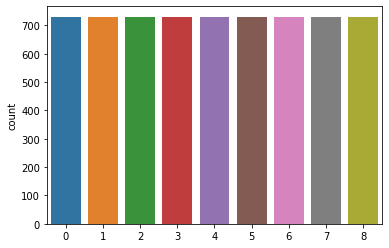

In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x_new,y_new)

sns.countplot(x=y_bal)

In [45]:
df = pd.DataFrame()
  
x_bal_old, y_bal_old = sm.fit_resample(x,y)

x_train_bal_old, x_test_bal_old, y_train_bal_old, y_test_bal_old = train_test_split(x_bal_old,y_bal_old,test_size = 0.3)

x_train_scaled_bal_old = scaler.fit_transform(x_train_bal_old)
x_test_scaled_bal_old = scaler.transform(x_test_bal_old)

imputer_bal_old = KNNImputer()
imputer_bal_old.fit(x_train_scaled_bal_old)

x_train_imp_bal_old = pd.DataFrame(imputer_bal_old.transform(x_train_scaled_bal_old), columns = x_train_bal_old.columns)
x_test_imp_bal_old = pd.DataFrame(imputer_bal_old.transform(x_test_scaled_bal_old), columns = x_test_bal_old.columns)

rf.fit(x_train_imp_bal_old, y_train_bal_old)

y_pred_rf_bal_old = rf.predict(x_test_imp_bal_old)
print(rf.score(x_train_imp_bal_old,y_train_bal_old))
print(metrics.accuracy_score(y_test_bal_old,y_pred_rf_bal_old))

cm = metrics.confusion_matrix(y_test_bal_old, y_pred_rf_bal_old)
print(cm)

results = metrics.classification_report(y_test_bal_old,y_pred_rf_bal_old)
print(results)

1.0
0.8976697061803445
[[215   0   0   0   0   0   0   0   0]
 [  1 181   2   0   2   9   2   9  16]
 [  1   1 206   0   0   0   6   0   6]
 [  0   0   0 212   0   0   0   0   0]
 [  0   7   2   1 191   7   3   0   7]
 [  6   9   4   1   6 190   2  11   7]
 [  0   6   1   0   0   0 202   3   5]
 [  5   4   0   0   0   3   1 191   3]
 [ 11   7   7   2   7   4   1   4 184]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       215
           1       0.84      0.82      0.83       222
           2       0.93      0.94      0.93       220
           3       0.98      1.00      0.99       212
           4       0.93      0.88      0.90       218
           5       0.89      0.81      0.85       236
           6       0.93      0.93      0.93       217
           7       0.88      0.92      0.90       207
           8       0.81      0.81      0.81       227

    accuracy                           0.90      1974
   macro avg       0.90      

In [46]:
print(srf["surface"])

0       fine_concrete
1            concrete
2            concrete
3            concrete
4          soft_tiles
            ...      
3605            tiled
3606         concrete
3607         soft_pvc
3608         soft_pvc
3609         concrete
Name: surface, Length: 3610, dtype: object


In [47]:
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(x_bal,y_bal,test_size = 0.3)

x_train_scaled_bal = scaler.fit_transform(x_train_bal)
x_test_scaled_bal = scaler.transform(x_test_bal)

imputer_bal = KNNImputer()
imputer_bal.fit(x_train_scaled_bal)

x_train_imp_bal = pd.DataFrame(imputer_bal.transform(x_train_scaled_bal), columns = x_train_bal.columns)
x_test_imp_bal = pd.DataFrame(imputer_bal.transform(x_test_scaled_bal), columns = x_test_bal.columns)

rf.fit(x_train_imp_bal, y_train_bal)

y_pred_rf_bal = rf.predict(x_test_imp_bal)
print(rf.score(x_train_imp_bal,y_train_bal))
print(metrics.accuracy_score(y_test_bal,y_pred_rf_bal))

cm = metrics.confusion_matrix(y_test_bal, y_pred_rf_bal)
print(cm)

results = metrics.classification_report(y_test_bal,y_pred_rf_bal)
print(results)

1.0
0.9376899696048632
[[231   1   0   0   1   0   0   0   2]
 [  3 194   5   0   4   6   2   9   5]
 [  0   1 201   0   2   4   1   1   5]
 [  0   0   0 219   0   0   0   0   0]
 [  0   1   0   0 198   0   0   1   0]
 [  3   6   3   0   3 189   6   1   7]
 [  0   0   0   0   0   2 202   0   5]
 [  2   5   1   0   0   0   3 227   3]
 [  1   4   0   1   1   8   0   4 190]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       235
           1       0.92      0.85      0.88       228
           2       0.96      0.93      0.95       215
           3       1.00      1.00      1.00       219
           4       0.95      0.99      0.97       200
           5       0.90      0.87      0.89       218
           6       0.94      0.97      0.96       209
           7       0.93      0.94      0.94       241
           8       0.88      0.91      0.89       209

    accuracy                           0.94      1974
   macro avg       0.94      

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 21).fit(x_train_imp_bal)
print(pca.explained_variance_ratio_.cumsum())

x_train_pca = pca.transform(x_train_imp_bal) 
x_test_pca = pca.transform(x_test_imp_bal)

rf.fit(x_train_pca, y_train_bal)

y_pred_rf_pca = rf.predict(x_test_pca)
print(rf.score(x_train_pca,y_train_bal))
print(metrics.accuracy_score(y_test_bal,y_pred_rf_pca))

cm = metrics.confusion_matrix(y_test_bal, y_pred_rf_pca)
print(cm)

results = metrics.classification_report(y_test_bal,y_pred_rf_bal)
print(results)

[0.40267242 0.53863906 0.62979183 0.71436039 0.77402732 0.82287867
 0.85127583 0.87915115 0.90515712 0.92977006 0.94650067 0.96001408
 0.97013876 0.97717327 0.98269922 0.98608644 0.98882297 0.99102383
 0.99283795 0.99455329 0.99570089]
1.0
0.8890577507598785
[[227   6   1   0   0   0   0   0   1]
 [  4 175   7   0   8   9   0  17   8]
 [  3   1 194   0   1   3   0   3  10]
 [  0   0   0 219   0   0   0   0   0]
 [  0   3   4   0 188   3   0   1   1]
 [  2   6   8   3   3 179   2   6   9]
 [  2   0   0   1   0   3 199   0   4]
 [  2  20   1   0   4   3   3 205   3]
 [  0  15   2   2   3  10   0   8 169]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       235
           1       0.92      0.85      0.88       228
           2       0.96      0.93      0.95       215
           3       1.00      1.00      1.00       219
           4       0.95      0.99      0.97       200
           5       0.90      0.87      0.89       218
          

In [55]:
###############################################################################
# BEST MODEL:

for col in mvt.columns:
    mvt_new[col+'_mean'] = mvt.groupby(['series_id'])[col].mean()
    mvt_new[col+'_min'] = mvt.groupby(['series_id'])[col].min()
    mvt_new[col+'_max'] = mvt.groupby(['series_id'])[col].max()
    mvt_new[col+'_std'] = mvt.groupby(['series_id'])[col].std()
    
x_new = mvt_new.drop(["series_id_mean","series_id_min","series_id_max","series_id_std","measurement_number_mean","measurement_number_min","measurement_number_max","measurement_number_std"],axis=1)
y_new = encoder.fit_transform(srf["surface"])

x_bal, y_bal = sm.fit_resample(x_new,y_new)

x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(x_bal,y_bal,test_size = 0.3)

x_train_scaled_bal = scaler.fit_transform(x_train_bal)
x_test_scaled_bal = scaler.transform(x_test_bal)

imputer_bal = KNNImputer()
imputer_bal.fit(x_train_scaled_bal)

x_train_imp_bal = pd.DataFrame(imputer_bal.transform(x_train_scaled_bal), columns = x_train_bal.columns)
x_test_imp_bal = pd.DataFrame(imputer_bal.transform(x_test_scaled_bal), columns = x_test_bal.columns)

rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train_imp_bal, y_train_bal)

y_pred_rf_bal = rf.predict(x_test_imp_bal)
print(rf.score(x_train_imp_bal,y_train_bal))
print(metrics.accuracy_score(y_test_bal,y_pred_rf_bal))

cm = metrics.confusion_matrix(y_test_bal, y_pred_rf_bal)
print(cm)

results = metrics.classification_report(y_test_bal,y_pred_rf_bal)
print(results)

1.0
0.9463019250253293
[[220   0   0   0   1   0   0   0   2]
 [  2 188   2   0   4   3   5   4   5]
 [  1   3 203   0   3   0   0   0   7]
 [  0   0   0 219   0   0   0   0   0]
 [  1   0   3   0 204   0   0   2   1]
 [  0   4   1   0   3 212   3   1   6]
 [  0   0   0   1   0   0 238   1   0]
 [  1   4   0   0   0   3   3 191   0]
 [  4   2   6   1   0   6   0   7 193]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       223
           1       0.94      0.88      0.91       213
           2       0.94      0.94      0.94       217
           3       0.99      1.00      1.00       219
           4       0.95      0.97      0.96       211
           5       0.95      0.92      0.93       230
           6       0.96      0.99      0.97       240
           7       0.93      0.95      0.94       202
           8       0.90      0.88      0.89       219

    accuracy                           0.95      1974
   macro avg       0.95      

PART 4 QUESTION 4A

I chose the random forest classifier, using 1000 estimators as a hyperparameter, with SMOTE and KNN imputation on the engineered features (i.e. the mean, minimum, maximum, and standard deviation) of the movement data. I used SMOTE and KNN imputer to add synthetic data to make up for the imbalanced amount of data for certain surfaces like hard tiles. I used the random forest classifier because it performed better than the logistic regression and KNN classifier models. 

Regarding the performance, this model has a perfect score on the training data and an accuracy score of about 0.95 on the training data. The model has above 0.85 precision and recall for all surfaces but performs worst on concrete and wood. 